*Task 1: Exploratory Data Analysis (EDA) and Business Insights*

Loading datasets...
Datasets loaded successfully.
Checking for missing values...
Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Checking for duplicates...
Duplicates in Customers: 0
Duplicates in Products: 0
Duplicates in Transactions: 0

Generating summary statistics for Transactions...
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000 

Enter the threshold for grouping smaller regions:  10


Plotting customer distribution by region...


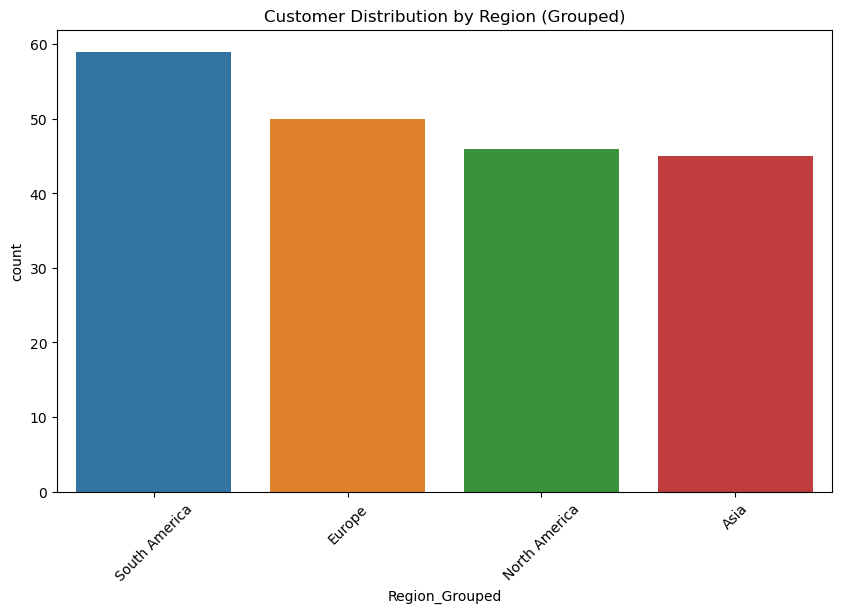

Calculating top 10 products by sales...
Plotting top 10 products by sales...


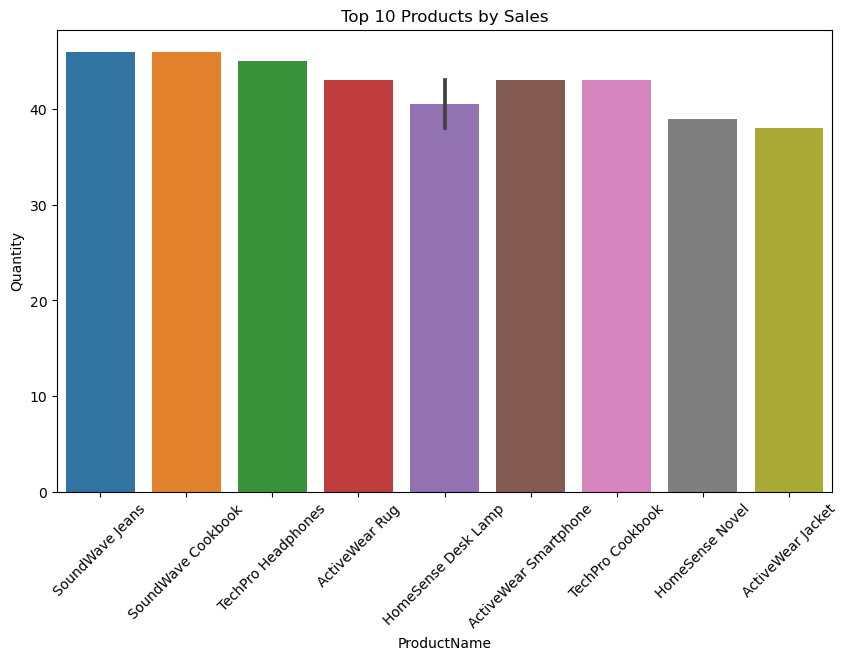

Parsing TransactionDate column...
Aggregating monthly sales data...
Plotting monthly sales trends...


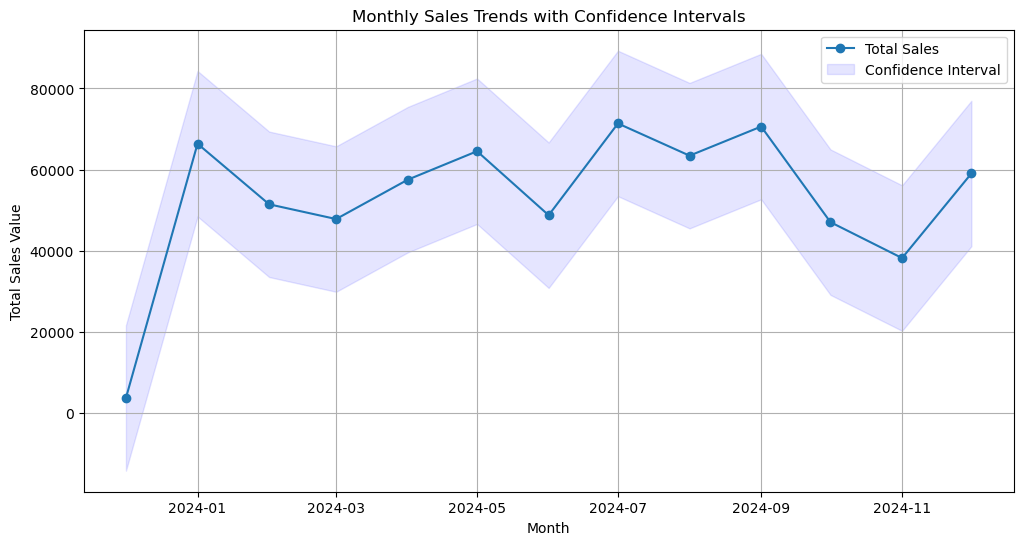

Saving cleaned datasets...
Cleaned datasets saved successfully.


In [19]:
# Importing nesessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
# Reading customer, product, and transaction data from CSV files.
print("Loading datasets...")
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')
print("Datasets loaded successfully.")

# Data Cleaning
# Checking for missing values in each dataset and printing the results.
print("Checking for missing values...")
print("Missing values in Customers:")
print(customers.isnull().sum())
print("\nMissing values in Products:")
print(products.isnull().sum())
print("\nMissing values in Transactions:")
print(transactions.isnull().sum())

# Checking for duplicate rows in each dataset.
print("\nChecking for duplicates...")
print("Duplicates in Customers:", customers.duplicated().sum())
print("Duplicates in Products:", products.duplicated().sum())
print("Duplicates in Transactions:", transactions.duplicated().sum())

# Exploratory Data Analysis
# Summary statistics for numeric columns in the transactions dataset.
print("\nGenerating summary statistics for Transactions...")
print(transactions.describe())

# Customer distribution by region
# Grouping smaller regions into an 'Other' category for a cleaner visualization.
print("Grouping regions with fewer entries into 'Other'...")
region_counts = customers['Region'].value_counts()
threshold = int(input("Enter the threshold for grouping smaller regions: "))  # Configurable threshold for grouping.
other_regions = region_counts[region_counts < threshold].index
customers['Region_Grouped'] = customers['Region'].replace(other_regions, 'Other')

# Plotting the distribution of customers by grouped regions.
print("Plotting customer distribution by region...")
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region_Grouped', order=customers['Region_Grouped'].value_counts().index)
plt.title('Customer Distribution by Region (Grouped)')
plt.xticks(rotation=45)
plt.show()

# Top 10 products by sales
# Aggregating product quantities and filtering out products with zero sales.
print("Calculating top 10 products by sales...")
product_sales = transactions.groupby('ProductID')['Quantity'].sum()
product_sales = product_sales[product_sales > 0].sort_values(ascending=False).head(10)  # Top 10 products by sales.
product_sales = product_sales.reset_index().merge(products, on='ProductID')

# Plotting the top 10 products by sales quantity.
print("Plotting top 10 products by sales...")
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales, x='ProductName', y='Quantity')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45)
plt.show()

# Time-series analysis of transactions
# Converting TransactionDate to datetime format with error handling for invalid formats.
print("Parsing TransactionDate column...")
try:
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'], errors='coerce')
    if transactions['TransactionDate'].isnull().any():
        print("Warning: Some TransactionDate values could not be parsed and were set to NaT.")
except Exception as e:
    print(f"Error while parsing TransactionDate: {e}")

# Aggregating transaction values by month.
print("Aggregating monthly sales data...")
time_series = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).sum(numeric_only=True)

# Plotting monthly sales trends with confidence intervals.
print("Plotting monthly sales trends...")
plt.figure(figsize=(12, 6))
plt.plot(time_series.index.to_timestamp(), time_series['TotalValue'], marker='o', label='Total Sales')
plt.fill_between(time_series.index.to_timestamp(), 
                 time_series['TotalValue'] - time_series['TotalValue'].std(), 
                 time_series['TotalValue'] + time_series['TotalValue'].std(), 
                 color='blue', alpha=0.1, label='Confidence Interval')
plt.title('Monthly Sales Trends with Confidence Intervals')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.legend()
plt.grid()
plt.show()


# Save cleaned data
print("Saving cleaned datasets...")
# Saving customers without anonymization.
customers[['CustomerID', 'CustomerName', 'Region', 'SignupDate']].to_csv('Cleaned_Customers.csv', index=False)

# Saving cleaned product and transaction datasets.
products.to_csv('Cleaned_Products.csv', index=False)
transactions.to_csv('Cleaned_Transactions.csv', index=False)
print("Cleaned datasets saved successfully.")
